In [13]:
#from bitalg.Projekt.main import main
from bitalg.visualizer.main import Visualizer
from bitalg.Projekt.Triangle import Triangle
from bitalg.Projekt.Section import Section
from bitalg.Projekt.Point import Point


Point: (5,4)
Section: ([(5, 4), (3, 0)])
Triangle:
[(5, 4), (1, 7)]
[(1, 7), (3, 0)]
[(5, 4), (3, 0)]



-2.727272727272728 -6.636363636363637 -0.8181818181818099
Circle parameters:  Point: (1.363636363636364,3.3181818181818183) 3.699731953659023


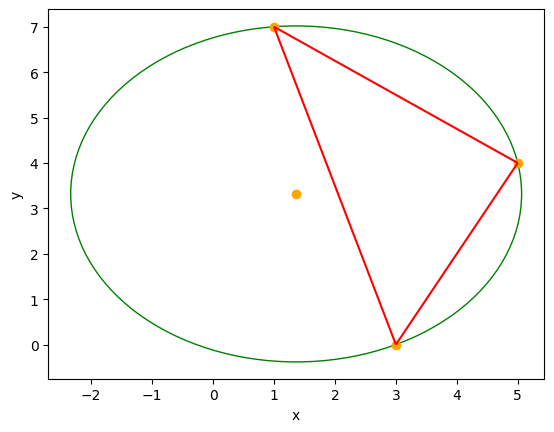

In [14]:
p1: Point = Point(5,4,1)
p2: Point = Point(3,0,2)
p3: Point = Point(1,7,3)
print(p1)
sec1: Section = Section(p1,p2,1)
sec2: Section = Section(p2,p3, 2)
sec3: Section = Section(p1,p3, 3)
print(sec1)
t1: Triangle = Triangle(p1,p2,p3)
print(t1)


vis = Visualizer()

T1 = Triangle(p1,p2,p3)
print()

q, r = T1.define_circle()
print("Circle parameters: ",q,r)
vis.add_circle([q.get_cords()[0],q.get_cords()[1],r],fill=False,color="green")
vis.add_point(q.get_cords(),color="orange")
vis.add_point([p1.get_cords(),p2.get_cords(),p3.get_cords()],color="orange")
vis.add_line_segment(T1.get_list_edges(),color="red")
vis.show()


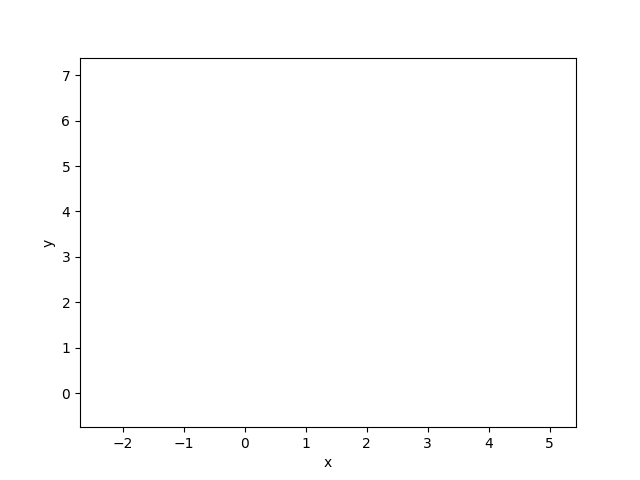

In [15]:
vis.show_gif(300)